### 导入数据

#### 提取节点的Attribute

In [1]:
import pandas as pd
import numpy as np
node_features = pd.read_csv('./data/Drug_Protein_Attribute.csv',header = None) 
node_features  

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
1,1,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
2,2,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
3,3,-0.007599,-0.007655,-0.003703,-0.007203,0.002032,0.006483,0.005779,-0.008866,-0.004960,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.003780,-0.015584,-0.005586,0.004156
4,4,1.180584,0.526513,0.793145,-0.245426,-0.220634,0.559357,1.059898,0.148331,-0.981740,...,0.003815,-0.553314,0.003378,0.335591,0.143528,-1.134055,0.629610,0.330191,0.377519,-0.798777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,1614,0.115819,0.086158,0.011299,0.008475,0.086158,0.074859,0.011299,0.007062,0.012712,...,0.001412,0.002825,0.002825,0.000000,0.001412,0.002825,0.002825,0.001412,0.002825,0.000000
1615,1615,0.153169,0.107394,0.017606,0.007042,0.096831,0.056338,0.012324,0.012324,0.019366,...,0.000000,0.000000,0.003521,0.000000,0.000000,0.001761,0.005282,0.000000,0.000000,0.000000
1616,1616,0.120000,0.111667,0.020000,0.008333,0.106667,0.060000,0.018333,0.008333,0.018333,...,0.001667,0.000000,0.001667,0.001667,0.000000,0.000000,0.005000,0.001667,0.000000,0.003333
1617,1617,0.131970,0.105948,0.009294,0.020446,0.098513,0.053903,0.020446,0.007435,0.014870,...,0.005576,0.001859,0.007435,0.000000,0.003717,0.000000,0.001859,0.001859,0.001859,0.000000


In [2]:
# 将词向量提取为特征,第二列到倒数第一列
node_features = node_features.iloc[:,1:]
 # 检查特征：共64个特征，837个样本点
print(node_features.shape)

(1619, 64)


#### 划分训练集测试集

In [3]:
DTIs= pd.read_csv('./data/Drug_Protein_Num.csv',header = None) 
DTIs 

,0,1
0,0,984
1,0,985
2,0,986
3,1,987
4,1,988
...,...,...
11391,877,1322
11392,877,1324
11393,969,1324
11394,969,1129


#### 生成随机种子

In [4]:
import math
import random
def partition(ls, size):
    """
    Returns a new list with elements
    of which is a list of certain size.

        >>> partition([1, 2, 3, 4], 3)
        [[1, 2, 3], [4]]
    """
    return [ls[i:i+size] for i in range(0, len(ls), size)]
# 由AllEdge产生RandomList
RandomList = random.sample(range(0, len(DTIs)), len(DTIs))
print('len(RandomList)', len(RandomList))
NewRandomList = partition(RandomList, math.ceil(len(RandomList) / 5))
print('len(NewRandomList[0])', len(NewRandomList[0]))
#NaN = pd.isnull(NewRandomList).any(0).nonzero()[0]
NewRandomList = pd.DataFrame(NewRandomList)
NewRandomList = NewRandomList.fillna(int(0))
NewRandomList = NewRandomList.astype(int)
NewRandomList.to_csv('./data/NewRandomList.csv', header=None,index=False)
del NewRandomList, RandomList

len(RandomList) 11396
len(NewRandomList[0]) 2280


In [5]:
Nindex = pd.read_csv('./data/NewRandomList.csv',header=None)
for i in range(len(Nindex)):
    kk = []
    for j in range(5):
        if j !=i:
            kk.append(j)
    index = np.hstack([np.array(Nindex)[kk[0]],np.array(Nindex)[kk[1]],np.array(Nindex)[kk[2]],np.array(Nindex)[kk[3]]])
    DTIs_train= pd.DataFrame(np.array(DTIs)[index])
    DTIs_train.to_csv('./data/DTIs_train'+str(i)+'.csv', header=None,index=False)
    DTIs_train = DTIs_train.sample(frac=1.0)
    DTIs_train.to_csv('./data/DTIs_train'+str(i)+'.txt', sep='\t' ,header=None,index=False)
    DTIs_test=pd.DataFrame(np.array(DTIs)[np.array(Nindex)[i]])
    DTIs_test.to_csv('./data/DTIs_test'+str(i)+'.csv', header=None,index=False)
    print(i)
del Nindex, index, DTIs_train, DTIs_test

0
1
2
3
4


#### 设置节点类型标签

In [4]:
labels = pd.DataFrame(np.random.rand(max(DTIs[1])+1,1))#pd.DataFrame(np.random.rand(max(NLMI_num),1))
labels[0:max(DTIs[0])+1]=0
labels[max(DTIs[0])+1:]=1
labels = labels[0] # 提取节点标签列
labels.to_csv('./data/labels.csv',header=0,index=0)
labels[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float64

### 生成负样本

In [7]:
def NegativeGenerate(LncDisease, AllRNA,AllDisease):
    # 负样本为全部的disease-rna（328*881）中随机抽取，未在内LncDisease即为负样本
    import random
    NegativeSample = []
    counterN = 0
    while counterN < len(LncDisease):  # 随机选出一个疾病rna对
        counterR = random.randint(0, len(AllRNA) - 1)
        counterD = random.randint(0, len(AllDisease) - 1)
        DiseaseAndRnaPair = []
        DiseaseAndRnaPair.append(AllRNA[counterR])
        DiseaseAndRnaPair.append(AllDisease[counterD])
        flag1 = 0
        counter = 0
        while counter < len(LncDisease):
            if DiseaseAndRnaPair == LncDisease[counter]:
                flag1 = 1
                break
            counter = counter + 1
        if flag1 == 1:
            continue
        flag2 = 0
        counter1 = 0
        while counter1 < len(NegativeSample):  # 在已选的负样本中没有，防止重复
            if DiseaseAndRnaPair == NegativeSample[counter1]:
                flag2 = 1
                break
            counter1 = counter1 + 1
        if flag2 == 1:
            continue
        if (flag1 == 0 & flag2 == 0):
            NamePair = []  # 生成对
            NamePair.append(AllRNA[counterR])
            NamePair.append(AllDisease[counterD])
            NegativeSample.append(NamePair)
            counterN = counterN + 1
    return NegativeSample
Dr = pd.read_csv('./data/drug_name.csv',header=0,names=['id','name'])
Pr = pd.read_csv('./data/protein_name.csv',header=0,names=['id','name'])
NegativeSample = NegativeGenerate(DTIs.values.tolist(),Dr['id'].values.tolist(),Pr['id'].values.tolist())
NegativeSample = pd.DataFrame(NegativeSample)
NegativeSample.to_csv('./data/NegativeSample.csv', header=None,index=False)
NegativeSample.head()

,0,1
0,639,1262
1,902,1211
2,968,1048
3,93,1255
4,706,996


### 建立邻接矩阵方阵

In [1]:
# 构建初始的邻接矩阵 #('./data/DDI_train'+str(i)+'.csv')
def load_file_as_Adj_matrix(filename):
    import scipy.sparse as sp
    DTIs_train = pd.read_csv(filename,header=None)
    if max(DTIs_train[1]) != 1618:
        relation_matrix = np.zeros((1618+1,1618+1))
    else:
        relation_matrix = np.zeros((max(DTIs_train[1]+1),max(DTIs_train[1]+1)))
    for i, j in np.array(DTIs_train):
        lnc, mi = int(i), int(j)
        relation_matrix[lnc, mi] = 1
    Adj = sp.csr_matrix(relation_matrix, dtype=np.float32)
    return Adj

In [6]:
# 构建GCN训练需要的邻接方阵
import scipy.sparse as sp
import torch
def load_data(adj,node_features,node_labels):
  features = sp.csr_matrix(node_features, dtype=np.float32)  # 储存为csr型稀疏矩阵
  # build symmetric adjacency matrix   论文里A^=(D~)^0.5 A~ (D~)^0.5这个公式
  # adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
  # 对于无向图，邻接矩阵是对称的。上一步得到的adj是按有向图构建的，转换成无向图的邻接矩阵需要扩充成对称矩阵
  features = normalize(features)
  adj = normalize(adj + sp.eye(adj.shape[0]))   # eye创建单位矩阵，第一个参数为行数，第二个为列数
  # 对应公式A~=A+IN
  # 分别构建训练集、验证集、测试集，并创建特征矩阵、标签向量和邻接矩阵的tensor，用来做模型的输入
  idx_train = range(500)
  idx_val = range(500, 660)
  idx_test = range(660, int(adj.shape[0]))  
  features = torch.FloatTensor(np.array(features.todense()))  # tensor为pytorch常用的数据结构
  labels = torch.LongTensor(np.array(node_labels))
  adj = sparse_mx_to_torch_sparse_tensor(adj)   # 邻接矩阵转为tensor处理
  idx_train = torch.LongTensor(idx_train)
  idx_val = torch.LongTensor(idx_val)
  idx_test = torch.LongTensor(idx_test)
  return adj, features, labels, idx_train, idx_val, idx_test  
def normalize(mx):
  """Row-normalize sparse matrix"""
  rowsum = np.array(mx.sum(1))  # 对每一行求和
  r_inv = np.power(rowsum, -1).flatten()  # 求倒数
  r_inv[np.isinf(r_inv)] = 0.  # 如果某一行全为0，则r_inv算出来会等于无穷大，将这些行的r_inv置为0
  r_mat_inv = sp.diags(r_inv)  # 构建对角元素为r_inv的对角矩阵
  mx = r_mat_inv.dot(mx)
  # 用对角矩阵与原始矩阵的点积起到标准化的作用，原始矩阵中每一行元素都会与对应的r_inv相乘，最终相当于除以了sum
  return mx

def accuracy(output, labels):
  preds = output.max(1)[1].type_as(labels) # 使用type_as(tesnor)将张量转换为给定类型的张量。
  correct = preds.eq(labels).double()  # 记录等于preds的label eq:equal
  correct = correct.sum()
  return correct / len(labels)

def sparse_mx_to_torch_sparse_tensor(sparse_mx):    # 把一个sparse matrix转为torch稀疏张量
  """
  numpy中的ndarray转化成pytorch中的tensor : torch.from_numpy()
  pytorch中的tensor转化成numpy中的ndarray : numpy()
  """
  sparse_mx = sparse_mx.tocoo().astype(np.float32)
  indices = torch.from_numpy(np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
  # 不懂的可以去看看COO性稀疏矩阵的结构
  values = torch.from_numpy(sparse_mx.data)
  shape = torch.Size(sparse_mx.shape)
  return torch.sparse.FloatTensor(indices, values, shape)

### 构建GCN

In [7]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module

class GraphConvolution(Module):

    # 初始化层：输入feature，输出feature，权重，偏移
    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))  # FloatTensor建立tensor
        # 常见用法self.v = torch.nn.Parameter(torch.FloatTensor(hidden_size))：
        # 首先可以把这个函数理解为类型转换函数，将一个不可训练的类型Tensor转换成可以训练的类型parameter并将这个parameter
        # 绑定到这个module里面，所以经过类型转换这个self.v变成了模型的一部分，成为了模型中根据训练可以改动的参数了。
        # 使用这个函数的目的也是想让某些变量在学习的过程中不断的修改其值以达到最优化。
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
            # Parameters与register_parameter都会向parameters写入参数，但是后者可以支持字符串命名
        self.reset_parameters()

    # 初始化权重
    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        # size()函数主要是用来统计矩阵元素个数，或矩阵某一维上的元素个数的函数  size（1）为行
        self.weight.data.uniform_(-stdv, stdv)  # uniform() 方法将随机生成下一个实数，它在 [x, y] 范围内
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    '''
    前馈运算 即计算A~ X W(0)
    input X与权重W相乘，然后adj矩阵与他们的积稀疏乘
    直接输入与权重之间进行torch.mm操作，得到support，即XW
    support与adj进行torch.spmm操作，得到output，即AXW选择是否加bias
    '''
    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        # torch.mm(a, b)是矩阵a和b矩阵相乘，torch.mul(a, b)是矩阵a和b对应位相乘，a和b的维度必须相等
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias 
        else:
            return output
#通过设置断点，可以看出output的形式是0.01，0.01，0.01，0.01，0.01，#0.01，0.94]，里面的值代表该x对应标签不同的概率，故此值可转换为#[0,0,0,0,0,0,1]，对应我们之前把标签onthot后的第七种标签

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'



In [16]:
import torch.nn as nn
import torch.nn.functional as F
class GCN(nn.Module):
  def __init__(self, nfeat, nhid, nclass, dropout):
    # 底层节点的参数，feature的个数；隐层节点个数；最终的分类数
    super(GCN, self).__init__()  #  super()._init_()在利用父类里的对象构造函数
    self.gc1 = GraphConvolution(nfeat, nhid)   # gc1输入尺寸nfeat，输出尺寸nhid
    self.gc2 = GraphConvolution(nhid, nclass)  # gc2输入尺寸nhid，输出尺寸ncalss
    self.dropout = dropout
    self.weight = Parameter(torch.FloatTensor(nfeat, nhid))  # FloatTensor建立tensor
    # 输入分别是特征和邻接矩阵。最后输出为输出层做log_softmax变换的结果
  def forward(self, x, adj):
    x = F.relu(self.gc1(x, adj))   # adj即公式Z=softmax(A~Relu(A~XW(0))W(1))中的A~
    x2 = F.dropout(x, self.dropout, training = self.training)  # x要dropout
    x2 = self.gc2(x2, adj)
    return F.log_softmax(x2, dim = 1), x2   #, x  # 参数dim=1表示对每一行求softmax，那么每一行的值加起来都等于1。

In [10]:
import numpy
print(numpy.__version__)

1.19.5


### 使用GCN训练属性

In [31]:
# Training settings
learning_rate = 0.01
weight_decay = 5e-4
epoch_num = 200
dropout = 0.02
#in_size = node_features  #设置输入层的维数
hi_size = 64 # 16 #设置隐藏层的维数

name = locals() # 利用locals()创建变量
for i in range(5):
    Adj = load_file_as_Adj_matrix('./data/DTIs_train'+str(i)+'.csv')
    adj, train_features, trian_labels, idx_train, idx_val, idx_test = load_data(Adj,node_features,labels)
    model = GCN(nfeat=train_features.shape[1],
            nhid=hi_size,
            nclass= 16,#labels.max().item() + 1,
            dropout=dropout)
    model.train()
    global Emdebding_train, output
    output, Emdebding_train = model(train_features, adj)
    Emdebding_GCN = pd.DataFrame(Emdebding_train.detach().numpy())
    GCN_A = pd.concat([Emdebding_GCN, node_features], axis=1)
    GCN_A.to_csv('./data/Emdebding_GCN_1'+str(i)+'.csv', header=None,index=False)
    del Adj, adj, train_features, trian_labels, idx_train, idx_val, idx_test, output
    print(i)
GCN_A.head()

0
1
2
3
4


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-0.119223,0.062801,0.091221,-0.026986,-0.244059,0.161016,0.140487,-0.074468,-0.117377,0.173524,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
1,-0.115957,0.071414,0.089402,-0.029835,-0.242642,0.151092,0.131412,-0.075680,-0.111885,0.185022,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
2,-0.117427,0.081430,0.092609,-0.025335,-0.248415,0.163308,0.146450,-0.073842,-0.117931,0.186314,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
3,-0.115661,0.067379,0.087425,-0.026944,-0.236701,0.156618,0.136670,-0.075438,-0.113514,0.177843,...,-0.005631,0.002488,-0.013618,-0.008738,0.007777,0.005095,0.00378,-0.015584,-0.005586,0.004156
4,-0.112165,0.068568,0.088584,-0.024311,-0.233877,0.148684,0.140717,-0.069315,-0.111071,0.178269,...,0.003815,-0.553314,0.003378,0.335591,0.143528,-1.134055,0.62961,0.330191,0.377519,-0.798777


In [32]:
dd = pd.DataFrame(np.random.randint(0,1,node_features.shape[0]))
dd['index']=dd.index
dd

,0,index
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
1614,0,1614
1615,0,1615
1616,0,1616
1617,0,1617


### 生成最终训练的数据

In [34]:
import scipy.sparse as sp
import pandas as pd
import numpy as np
creat_var = locals() # 利用locals()创建变量
creat_var = locals() # 利用locals()创建变量
Negative = pd.read_csv('./data/NegativeSample.csv',header=None)
Nindex = pd.read_csv('./data/NewRandomList.csv',header=None)
Negative[2] = Negative.apply(lambda x: 0 if x[0] < 0 else 0, axis=1)
for i in range(5):
    data_train_feature, data_test_feature = [], []
    Embedding_GCN = pd.read_csv('./data/Emdebding_GCN_1'+str(i)+'.csv',header=None)
    Embedding_Node2vec = pd.read_csv('./data/Embedding_DeepWalk'+str(i)+'.txt', sep=' ',header=None)
    Embedding_Node2vec = Embedding_Node2vec.sort_values(0,ascending=True)# 建立序号排序
    Embedding_Node2vec.set_index(0, inplace=True)
    Embedding_Node2vec['index'] = Embedding_Node2vec.index
    Embedding = pd.merge(dd,Embedding_Node2vec,how='left',on='index')
    Embedding = Embedding.fillna(int(0)).iloc[:,2:]
    train_data = pd.read_csv('./data/DTIs_train'+str(i)+'.csv',header=None)
    train_data[2] = train_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    kk = []
    for j in range(5):
        if j !=i:
            kk.append(j)
    index = np.hstack([np.array(Nindex)[kk[0]],np.array(Nindex)[kk[1]],np.array(Nindex)[kk[2]],np.array(Nindex)[kk[3]]])
    result = train_data.append(pd.DataFrame(np.array(Negative)[index]))    
    labels_train = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[r,0]],np.array(Embedding_Node2vec)[result.iloc[r,0]]])
    for r in range(len(result)):# np.hstack([np.array(Embedding_GCN)[result.iloc[r,1]],np.array(Embedding_Node2vec)[result.iloc[r,1]]])
        data_train_feature.append(np.hstack([np.hstack([np.array(Embedding_GCN)[result.iloc[r,0]],np.array(Embedding)[result.iloc[r,0]]]),
                                             np.hstack([np.array(Embedding_GCN)[result.iloc[r,1]],np.array(Embedding)[result.iloc[r,1]]])]))
    creat_var['data_train'+str(i)] = data_train_feature
    creat_var['labels_train'+str(i)] = labels_train
    print(len(labels_train))
    del labels_train, result, data_train_feature, r
    test_data = pd.read_csv('./data/DTIs_test'+str(i)+'.csv',header=None)
    test_data[2] = test_data.apply(lambda x: 1 if x[0] < 0 else 1, axis=1)
    result = test_data.append(pd.DataFrame(np.array(Negative)[np.array(Nindex)[i]]))    
    labels_test = result[2]# np.hstack([np.array(Embedding_GCN)[result.iloc[x,0]],np.array(Embedding_Node2vec)[result.iloc[x,0]]])
    for x in range(len(result)):#np.hstack([np.array(Embedding_GCN)[result.iloc[x,1]],np.array(Embedding_Node2vec)[result.iloc[x,1]]])
        data_test_feature.append(np.hstack([np.hstack([np.array(Embedding_GCN)[result.iloc[x,0]],np.array(Embedding)[result.iloc[x,0]]]),
                                            np.hstack([np.array(Embedding_GCN)[result.iloc[x,1]],np.array(Embedding)[result.iloc[x,1]]])]))
    creat_var['data_test'+str(i)] = data_test_feature
    creat_var['labels_test'+str(i)] = labels_test
    print(len(labels_test))
    del train_data, test_data, labels_test, result, data_test_feature, x#, Embedding_Node2vec, Embedding, Embedding_GCN    
    print(i)

18240
4560
0
18240
4560
1
18240
4560
2
18240
4560
3
18240
4560
4


In [35]:
data_train = [data_train0,data_train1,data_train2,data_train3,data_train4]
data_test = [data_test0,data_test1,data_test2,data_test3,data_test4]
labels_train = [labels_train0,labels_train1,labels_train2,labels_train3,labels_train4]
labels_test = [labels_test0,labels_test1,labels_test2,labels_test3,labels_test4]
print(np.array(data_train0).shape)
print(np.array(data_test0).shape)
print(np.array(labels_train0).shape)
print(np.array(labels_test0).shape)

(18240, 288)
(4560, 288)
(18240,)
(4560,)


### 开始训练

#### 评价指标

In [14]:
# 评价指标
import math
def MyConfusionMatrix(y_real,y_predict): 
    from sklearn.metrics import confusion_matrix
    CM = confusion_matrix(y_real, y_predict)
    print(CM)
    CM = CM.tolist()
    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    TP = CM[1][1] 
    print('TN:%d, FP:%d, FN:%d, TP:%d' % (TN, FP, FN, TP))
    Acc = (TN + TP) / (TN + TP + FN + FP)
    Sen = TP / (TP + FN)
    Spec = TN / (TN + FP)
    Prec = TP / (TP + FP)
    MCC = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # 分母可能出现0，需要讨论待续
    print('Acc:', round(Acc, 4))
    print('Sen:', round(Sen, 4))
    print('Spec:', round(Spec, 4))
    print('Prec:', round(Prec, 4))
    print('MCC:', round(MCC, 4))
    Result = []
    Result.append(round(Acc, 4))
    Result.append(round(Sen, 4))
    Result.append(round(Spec, 4))
    Result.append(round(Prec, 4))
    Result.append(round(MCC, 4))
    return Result

def MyAverage(matrix):
    SumAcc = 0
    SumSen = 0
    SumSpec = 0
    SumPrec = 0
    SumMcc = 0
    counter = 0
    while counter < len(matrix):
        SumAcc = SumAcc + matrix[counter][0]
        SumSen = SumSen + matrix[counter][1]
        SumSpec = SumSpec + matrix[counter][2]
        SumPrec = SumPrec + matrix[counter][3]
        SumMcc = SumMcc + matrix[counter][4]
        counter = counter + 1
    print('AverageAcc:',SumAcc / len(matrix))
    print('AverageSen:', SumSen / len(matrix))
    print('AverageSpec:', SumSpec / len(matrix))
    print('AveragePrec:', SumPrec / len(matrix))
    print('AverageMcc:', SumMcc / len(matrix))
    return

def MyStd(result):
    import numpy as np
    NewMatrix = []
    counter = 0
    while counter < len(result[0]):
        row = []
        NewMatrix.append(row)
        counter = counter + 1
    counter = 0
    while counter < len(result):
        counter1 = 0
        while counter1 < len(result[counter]):
            NewMatrix[counter1].append(result[counter][counter1])
            counter1 = counter1 + 1
        counter = counter + 1
    StdList = []
    MeanList = []
    counter = 0
    while counter < len(NewMatrix):
        # std
        arr_std = np.std(NewMatrix[counter], ddof=1)
        StdList.append(arr_std)
        # mean
        arr_mean = np.mean(NewMatrix[counter])
        MeanList.append(arr_mean)
        counter = counter + 1
    result.append(MeanList)
    result.append(StdList)
    # 换算成百分比制
    counter = 0
    while counter < len(result):
        counter1 = 0
        while counter1 < len(result[counter]):
            result[counter][counter1] = round(result[counter][counter1] * 100, 2)
            counter1 = counter1 + 1
        counter = counter + 1
    return result

import csv
def StorFile(data, fileName):
    with open(fileName, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(data)
    return

#### 使用Machine Learning

进行5折交叉验证
正在划分训练集和测试集...
划分完毕！
开始训练
[[2131  149]
 [ 382 1898]]


C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


---------------------------------------------

fold =  0
---------------------------------------------

[[2131  149]
 [ 382 1898]]
TN:2131, FP:149, FN:382, TP:1898
Acc: 0.8836
Sen: 0.8325
Spec: 0.9346
Prec: 0.9272
MCC: 0.7711
正在划分训练集和测试集...
划分完毕！
开始训练
[[2127  153]
 [ 367 1913]]


C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


---------------------------------------------

fold =  1
---------------------------------------------

[[2127  153]
 [ 367 1913]]
TN:2127, FP:153, FN:367, TP:1913
Acc: 0.886
Sen: 0.839
Spec: 0.9329
Prec: 0.9259
MCC: 0.7754
正在划分训练集和测试集...
划分完毕！
开始训练
[[2134  146]
 [ 391 1889]]


C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


---------------------------------------------

fold =  2
---------------------------------------------

[[2134  146]
 [ 391 1889]]
TN:2134, FP:146, FN:391, TP:1889
Acc: 0.8822
Sen: 0.8285
Spec: 0.936
Prec: 0.9283
MCC: 0.7689
正在划分训练集和测试集...
划分完毕！
开始训练
[[2135  145]
 [ 384 1896]]


C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


---------------------------------------------

fold =  3
---------------------------------------------

[[2135  145]
 [ 384 1896]]
TN:2135, FP:145, FN:384, TP:1896
Acc: 0.884
Sen: 0.8316
Spec: 0.9364
Prec: 0.929
MCC: 0.7722
正在划分训练集和测试集...
划分完毕！
开始训练
[[2144  136]
 [ 338 1942]]


C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


---------------------------------------------

fold =  4
---------------------------------------------

[[2144  136]
 [ 338 1942]]
TN:2144, FP:136, FN:338, TP:1942
Acc: 0.8961
Sen: 0.8518
Spec: 0.9404
Prec: 0.9346
MCC: 0.7952
AverageAcc: 0.88638
AverageSen: 0.83668
AverageSpec: 0.93606
AveragePrec: 0.9289999999999999
AverageMcc: 0.77656


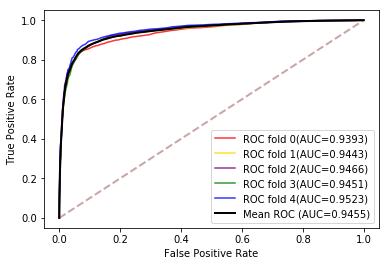

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score
# 画ROC曲线，计算AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
import time

now = time.strftime("%Y-%m-%d-%H_%M_%S",time.localtime(time.time()))

# print("迭代寻找最优参数")
# k_range = [301, 401, 501, 601, 701, 801, 901, 999]
# cv_scores = [] #用来放每个模型的结果值
# for n in k_range:
#     print('n_estimators: %d '%(n))
#     RandomF = RandomForestClassifier(n_estimators=n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
#     scores = cross_val_score(RandomF,data_train0, labels_train0,
#                              cv=5,
#                              scoring='roc_auc', 
#                              n_jobs=-1)  #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值，具体使用参考下面。
#     cv_scores.append(scores.mean())
# print("best_n_neighbors is：", k_range[cv_scores.index(max(cv_scores))])

print("进行5折交叉验证")
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,1000)
# 定义i用于绘制每次训练的ROC曲线

# ROC曲线颜色
colorlist = ['red', 'gold', 'purple', 'green', 'blue', 'black']
# 保存评价指标
AllResult = []

#data为数据集,利用KF.split划分训练集和测试集
for i in range(5):
    #建立模型，并对训练集进行测试，求出预测得分
    #划分训练集和测试集
    print('正在划分训练集和测试集...')
    X_train,X_test = data_train[i],data_test[i]
    Y_train,Y_test = np.array(labels_train[i]),np.array(labels_test[i])
    print('划分完毕！')
    #建立模型 # n_estimators=k_range[cv_scores.index(max(cv_scores))]
    best_RandomF = RandomForestClassifier(n_jobs=-1)# 选择最优的K=3传入模型
    print('开始训练')
    #训练模型
    best_RandomF.fit(np.array(X_train), np.array(Y_train))
    # 保存模型
    joblib.dump(best_RandomF,'./model/'+'RandomF'+str(i)+'.pkl')
    #利用model.predict获取测试集的预测值
    y_score0 = best_RandomF.predict(np.array(X_test))
    y_score_RandomF = best_RandomF.predict_proba(np.array(X_test))
    # 输出混淆矩阵
    print(confusion_matrix(Y_test, y_score0)) # , labels=[1,0]
    
    dd = np.vstack([Y_test, y_score_RandomF[:,1]]).T
    RandomF_data = pd.DataFrame(dd)
    RandomF_data.to_csv('./predict/' + 'RandomF_'+ str(i)+ 'Prob.csv', header = False, index = False)
    
    #计算fpr(假阳性率),tpr(真阳性率),thresholds(阈值)[绘制ROC曲线要用到这几个值]
    fpr,tpr,thresholds=roc_curve(Y_test,y_score_RandomF[:,1])
    #interp:插值 把结果添加到tprs列表中 
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    #计算auc
    roc_auc=auc(fpr,tpr)
    aucs.append(roc_auc)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数计算出来
    plt.plot(fpr,tpr,lw=1.5,alpha=0.8,color=colorlist[i],
             label='ROC fold %d(AUC=%0.4f)'% (i,roc_auc))
    print("---------------------------------------------\n")
    print("fold = ", i)
    print("---------------------------------------------\n")
    Result = MyConfusionMatrix(Y_test, y_score0)
    AllResult.append(Result)
    AllResult[i].append(roc_auc)
    i +=1

# 保存各种评价指标
MyAverage(AllResult)
# AllResult
# print('AllResult', AllResult)
MyNew = MyStd(AllResult)
# StorFile(MyNew, '五折的评价指标.csv')
df = pd.DataFrame(data = MyNew)
df.to_csv('./evaluate/RandomF_5-fold.csv', encoding='utf-8',header=None,index=False)

#画对角线
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='rosybrown',alpha=0.8)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,color=colorlist[i],label=r'Mean ROC (AUC=%0.4f)'%mean_auc,lw=2,alpha=1)
std_tpr=np.std(tprs,axis=0)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('./image/'+ now + 'RandomF_ROC.svg')
plt.show()      